In [2]:
import nengo
import numpy as np
import pylab as plt
from nengo.utils.matplotlib import rasterplot

%matplotlib widget

# Use NxSDK backend on Loihi
import nengo_loihi
nengo_loihi.set_defaults()

ModuleNotFoundError: No module named 'nengo_loihi'

In [2]:
img_shape = (10, 10, 1)

def input_func(t):
    data = [np.sin(t*4), 2*np.exp(-t)]
    return data

with nengo.Network(label="Control") as net:
    nengo_loihi.add_params(net)
    
    inp = nengo.Node(output=input_func)
    ens1 = nengo.Ensemble(n_neurons=40, dimensions=inp.size_out)
    ens2 = nengo.Ensemble(n_neurons=50, dimensions=ens1.size_out)
    nengo.Connection(inp, ens1)
    conn = nengo.Connection(ens1, ens2, solver=nengo.solvers.LstsqL2(weights=True))
    p = nengo.Probe(inp, synapse=0.01)
    spk_ens1 = nengo.Probe(ens1.neurons, synapse=0.01)
    spk_ens2 = nengo.Probe(ens2.neurons, synapse=0.01)
    # weights_p = nengo.Probe(conn, "weights", synapse=0.01, sample_every=0.01)

In [ ]:
with nengo.Simulator(net, seed=0, dt=1e-3) as sim:
    sim.run(1)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [166]:
with nengo_loihi.Simulator(net, seed=1, dt=1e-3) as sim:
    sim.run(5)
t = sim.trange()

INFO:DRV:  Connecting to 127.0.0.1:40655
INFO:DRV:      Host server up..............Done 0.79s
INFO:DRV:      Encoding axons/synapses.....Done 4.20ms
INFO:DRV:      Compiling Embedded snips....Done 0.14s
INFO:DRV:      Compiling MPDS Registers....Done 0.39ms
INFO:DRV:      Booting up..................Done 2.03s
INFO:DRV:      Encoding probes.............Done 0.42ms
INFO:DRV:      Transferring probes.........Done 1.85ms
INFO:DRV:      Configuring registers.......Done 9.26ms
INFO:DRV:      Transferring spikes.........Done 0.07s
INFO:DRV:      Executing...................Done 20.32s
INFO:DRV:      Processing timeseries.......Done 0.04s
INFO:DRV:  Executor: 5000 timesteps........Done 20.46s
INFO:HST:  Using Kapoho Bay serial number 446
INFO:HST:  Args chip=0 cpu=0 /loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1664464837.7474365/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 
INFO:HST:  Nx...
INFO:HST:  chip=0 cpu=0 halted, status=0x0


Text(0.5, 0.98, 'Tactile Stimuli')

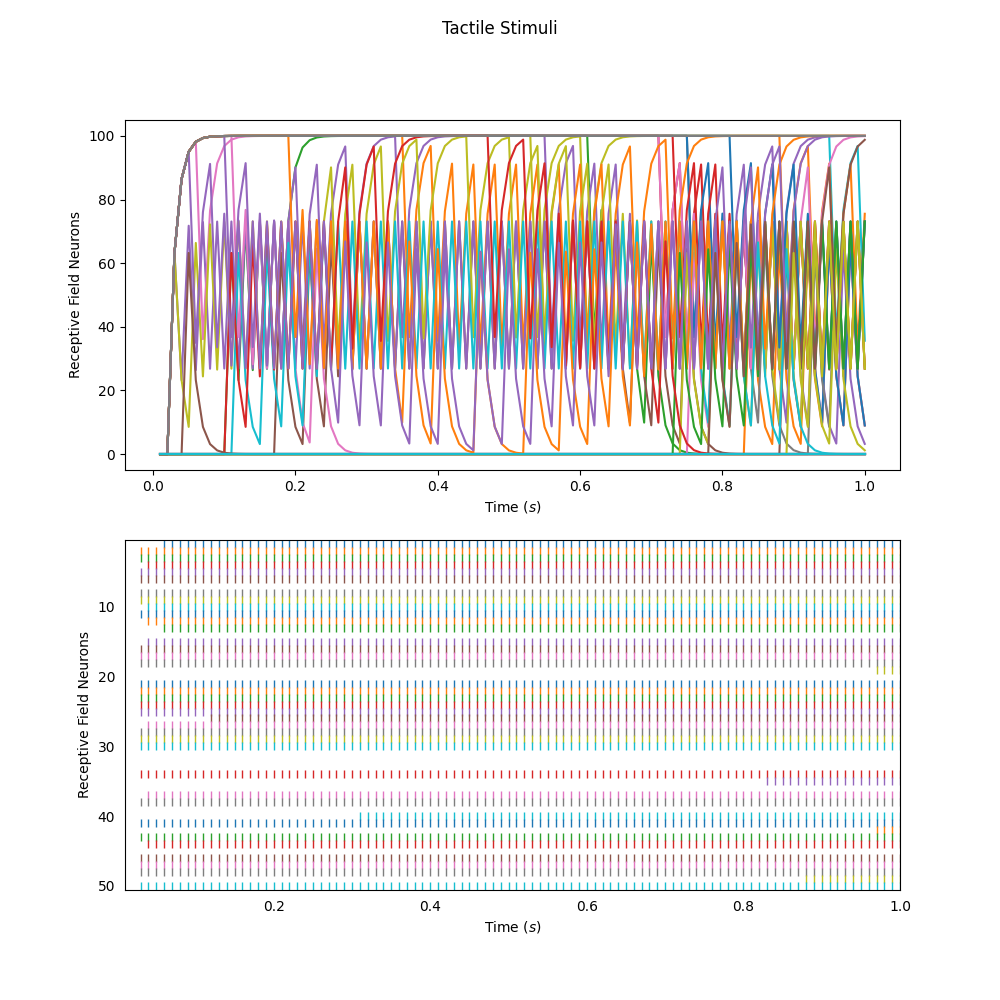

In [172]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[spk_ens1])
plt.xlabel(r"Time ($s$)")
plt.ylabel("Receptive Field Neurons")
plt.subplot(2, 1, 2)
rasterplot(sim.trange(), sim.data[spk_ens2])
plt.xlabel(r"Time ($s$)")
plt.ylabel("Receptive Field Neurons")
plt.suptitle("Tactile Stimuli")